In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.linear_model

# Datos diabetes

https://data.mendeley.com/datasets/wj9rwkp9c2/1

Datos recopilados de la sociedad iraquí, adquiridos del laboratorio del Medical City Hospital (el Centro especializado en endocrinología y diabetes-Al-Kindy Teaching Hospital). Archivos tomados de pacientes. Los datos consisten en información médica y análisis de laboratorio.

### Atributos:
* **Género** → Gender
* **Edad** → AGE
* **Urea** →  Urea
* **Proporción de creatinina** →  Cr
* **Hemoglobina glicosilada** →  HbA1c
* **Colesterol** →  Chol
* **Trigliceridos** →  TG
* **Colesterol "bueno"** →  HDL
* **Colesterol "malo"** →  LDL
* **Colesterol-2 "malo"** →  VLDL
* **Indice de masa corporal**→  BMI
* **Clase** →  CLASS

In [4]:
data = pd.read_csv('Dataset_of_Diabetes.csv')
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Limpieza de datos

In [5]:
data['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [6]:
data["Gender"].unique()

array(['F', 'M', 'f'], dtype=object)

In [7]:
data = data.replace(['N', 'P', 'Y' ], [1, 2, 3])
data = data.replace(['N ', 'Y ' ], [1, 3])
data = data.replace('f','F')
del data['ID']
del data['No_Pation']
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1


In [8]:
print('Número de datos = {}'.format(len(data)))

Número de datos = 1000


In [9]:
predictors = list(data.columns[:-1])
X = data[predictors]
y = data['CLASS']

# Dispersión de pares de atributos

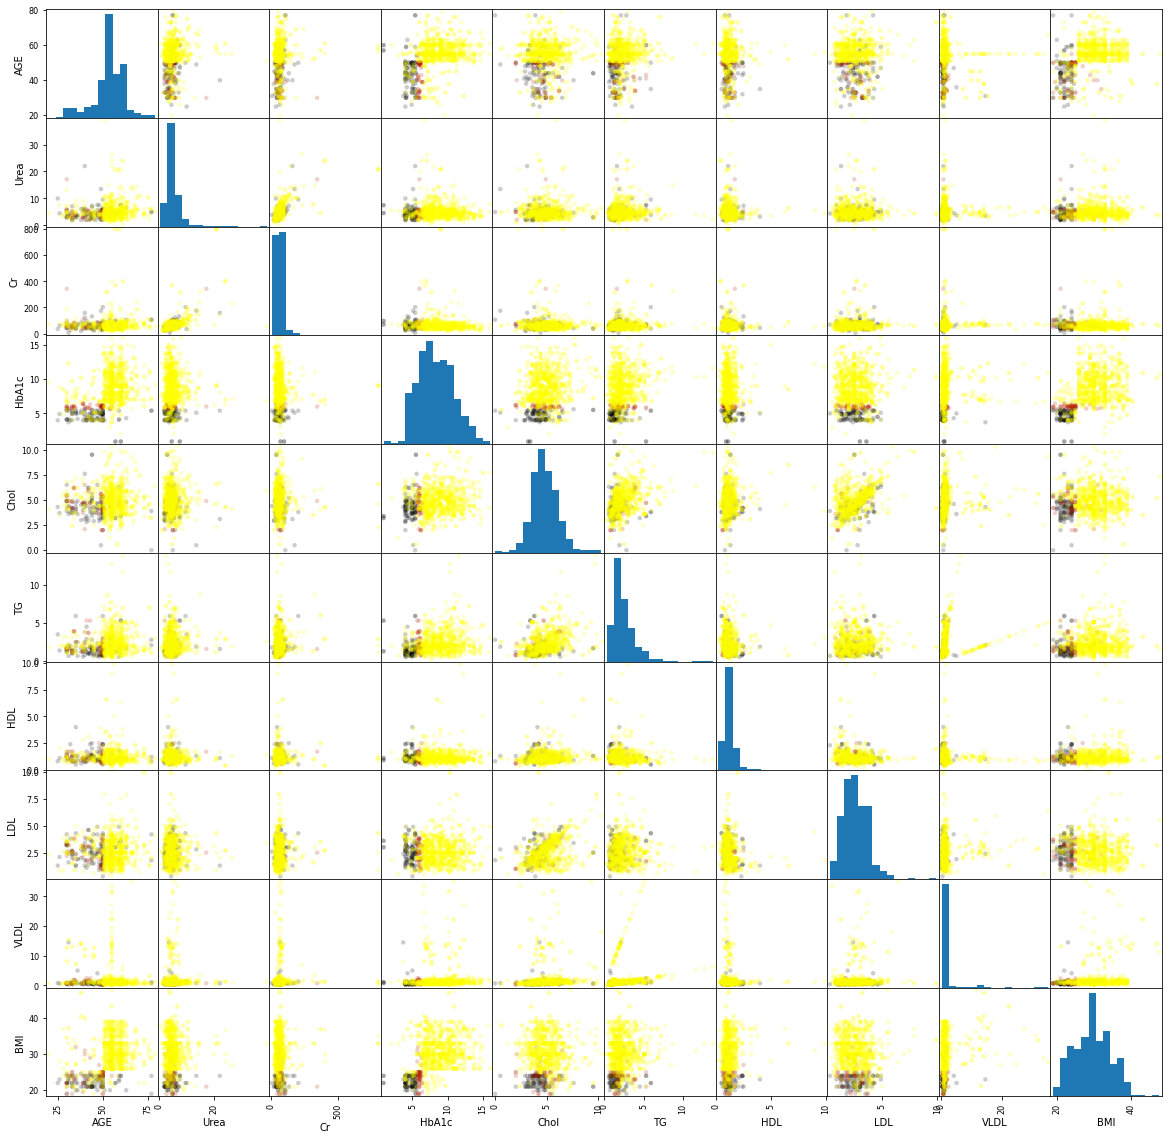

In [10]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter_matrix(X, c=y, marker = 'o', s=20, hist_kwds={'bins':15}, alpha=0.2, figsize=(20, 20), diagonal="hist", cmap=cmap);

In [11]:
Statistics = data.iloc[: , :-1].describe()
Statistics

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


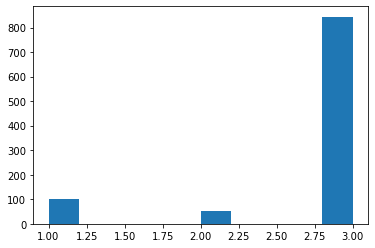

In [13]:
_ = plt.hist(data["CLASS"])

In [14]:
print('Proporción de pacientes sin Diabetes = {}'.format(len(data[data['CLASS']==1])/1000))
print('Proporción de pacientes con Prediabetes = {}'.format(len(data[data['CLASS']==2])/1000))
print('Proporción de pacientes con Diabetes = {}'.format(len(data[data['CLASS']==3])/1000))

Proporción de pacientes sin Diabetes = 0.103
Proporción de pacientes con Prediabetes = 0.053
Proporción de pacientes con Diabetes = 0.844


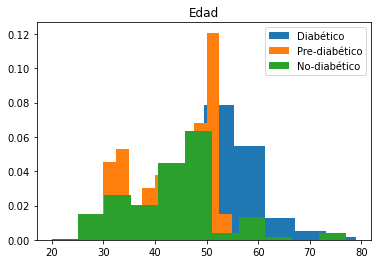

In [88]:
_ = plt.hist(data['AGE'][data['CLASS']==3], density=True, label='Diabético')
_ = plt.hist(data['AGE'][data['CLASS']==2], density=True, label='Pre-diabético')
_ = plt.hist(data['AGE'][data['CLASS']==1], density=True, label='No-diabético')
_ = plt.title('Edad')
_ = plt.legend()

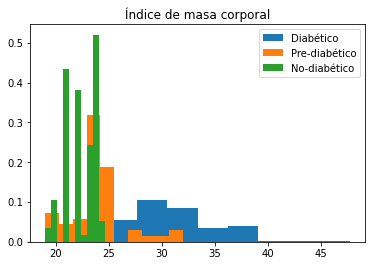

In [89]:
_ = plt.hist(data['BMI'][data['CLASS']==3], density=True, label='Diabético')
_ = plt.hist(data['BMI'][data['CLASS']==2], density=True, label='Pre-diabético')
_ = plt.hist(data['BMI'][data['CLASS']==1], density=True, label='No-diabético')
_ = plt.title('Índice de masa corporal')
_ = plt.legend()

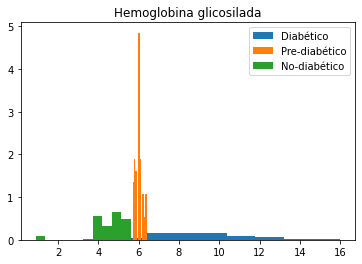

In [90]:
_ = plt.hist(data['HbA1c'][data['CLASS']==3], density=True, label='Diabético')
_ = plt.hist(data['HbA1c'][data['CLASS']==2], density=True, label='Pre-diabético')
_ = plt.hist(data['HbA1c'][data['CLASS']==1], density=True, label='No-diabético')
_ = plt.title('Hemoglobina glicosilada')
_ = plt.legend()

# Población de pacientes con diabetes

Proporción de hombres = 0.58
Proporción de mujeres = 0.42


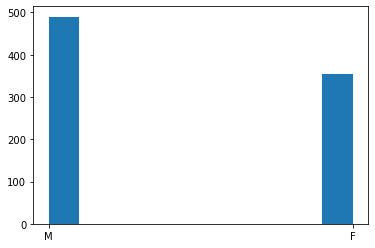

In [96]:
dataD = data[data['CLASS']==3]
_ = plt.hist(dataD["Gender"])
print('Proporción de hombres = {:.2f}'.format(len(dataD[dataD['Gender']=='M'])/len(dataD)))
print('Proporción de mujeres = {:.2f}'.format(len(dataD[dataD['Gender']=='F'])/len(dataD)))

In [99]:
Gender = dataD["Gender"]
Gender = Gender.replace(['M','F'],[1,2])
X_D = dataD.iloc[: , 1:-1]

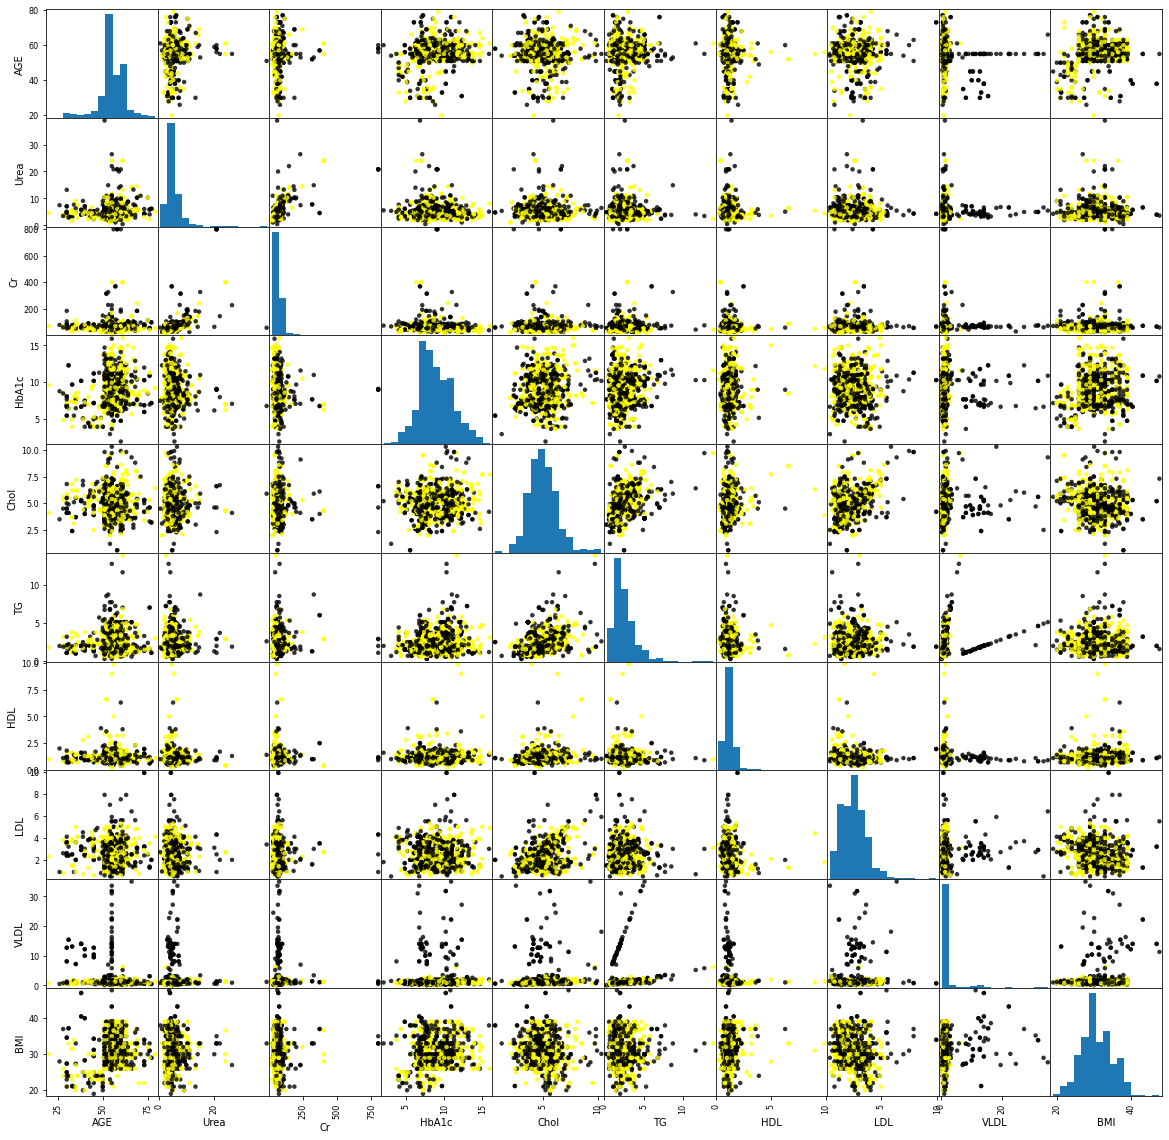

In [22]:
scatter_matrix(X_D, c=Gender, marker = 'o', s=20, hist_kwds={'bins':15}, alpha=0.8, figsize=(20, 20), diagonal="hist", cmap=cmap);

In [102]:
data_male = dataD[dataD['Gender']=='M']
data_female = dataD[dataD['Gender']=='F']

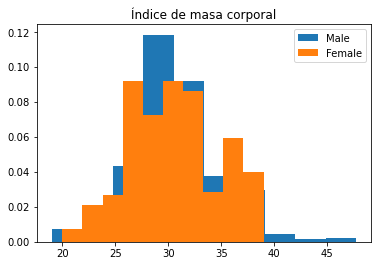

In [111]:
_ = plt.hist(data_male['BMI'], density=True, label='Male')
_ = plt.hist(data_female['BMI'], density=True, label='Female')
_ = plt.title('Índice de masa corporal')
_ = plt.legend()

# Método Shuffle
### $H_o$ := Las distribuciones para los datos del parámetro de BMI de hombres y mujeres son iguales.

In [ ]:
Estadística de los datos

In [134]:
StatisticsDM = data_male.iloc[: , :-1].describe()
StatisticsDF = data_female.iloc[: , :-1].describe()
print('\033[1m Estadística pacientes hombres \033[0m')
print(StatisticsDM['BMI'])
print('\n')
print('\033[1m Estadística pacientes mujeres \033[0m')
print(StatisticsDF['BMI'])

 Estadística pacientes hombres 
count    490.000000
mean      30.953592
std        4.176282
min       19.000000
25%       28.000000
50%       30.000000
75%       33.000000
max       47.750000
Name: BMI, dtype: float64


 Estadística pacientes mujeres 
count    354.000000
mean      30.614859
std        4.498697
min       20.000000
25%       27.000000
50%       30.000000
75%       33.000000
max       39.000000
Name: BMI, dtype: float64


In [136]:
imc = np.array(dataD["BMI"])
# imc = np.sort(imc)
gender = np.array(list(dataD["Gender"]))
ii_m = gender=="M"
ii_f = gender=="F"
n_m = np.count_nonzero(ii_m)
n_f = np.count_nonzero(ii_f)
n_minm = np.min(imc[ii_m])
n_minf = np.min(imc[ii_f])
n_maxm = np.max(imc[ii_m])
n_maxf = np.max(imc[ii_f])
# print(n_minm,n_minf)
# print(n_maxm,n_maxf)
rd=np.absolute(np.mean(imc[ii_m])-np.mean(imc[ii_f]))
# print(np.mean(imc[ii_f]))
#np.median(imc[ii_m]),np.median(imc[ii_f])

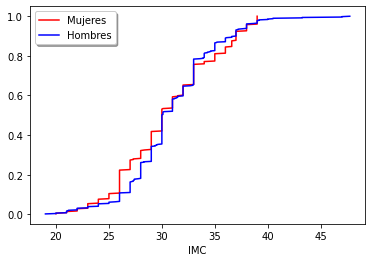

In [137]:
plt.plot(np.sort(imc[ii_f]), np.linspace(1/n_f,1,n_f),color="red")
plt.plot(np.sort(imc[ii_m]), np.linspace(1/n_m,1,n_m),color="blue")
plt.xlabel("IMC")
plt.legend(('Mujeres', 'Hombres'),loc='upper left', shadow=True)
plt.savefig('im1.pdf')  
plt.show()

In [138]:
#Método de Remuestreo
n_intentos = 100000
dif = np.zeros(n_intentos)
for i in range(n_intentos):
    np.random.shuffle(imc)
    valor_fake_m = imc[n_m:]
    valor_fake_f = imc[:n_f]
    #print(np.mean(imc), np.mean(valor_fake_m))
    #print(np.mean(imc), np.mean(valor_fake_f))
    dif[i] = np.mean(valor_fake_f)-np.mean(valor_fake_m)
#print(difm)
#print(diff)

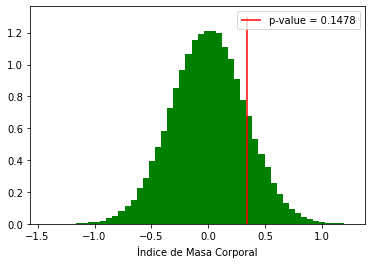

In [139]:
_ = plt.hist(dif,bins=50,color="green", density=True)
frac_a = np.count_nonzero(dif>rd)/len(dif)
_ = plt.vlines(rd,0,1.3,color="red", label = 'p-value = {}'.format(frac_a))
_ = plt.xlabel("Índice de Masa Corporal")
_ = plt.legend()

## Conclusión

#### Nó se rechaza la hipótesis nula. Los datos de índice de masa corporal de hombres y mujeres diabéticos pueden provenir de una misma distribución.

# TEST DE SHAPIRO-WILK

$H_0$:La distribución es normal

$H_1$:La distribución no es normal

In [132]:
alpha=0.05
shapiro_testm = stats.shapiro(imc[ii_m])
shapiro_testf = stats.shapiro(imc[ii_m])
# print(len(imc[ii_m]))
# print(len(imc[ii_f]))
#P-values
stm=shapiro_testm[1]
stf=shapiro_testf[1]
print(stm, stf)
if stm < alpha:
  print("La hipótesis nula puede ser rechazada")
else:
  print("La hipótesis nula No puede ser rechaza")
if stf < alpha:
  print("La hipótesis nula puede ser rechazada")
else:
  print("La hipótesis nula No puede ser rechaza")

8.239351700467523e-06 8.239351700467523e-06
La hipótesis nula puede ser rechazada
La hipótesis nula puede ser rechazada


# Otros atributos

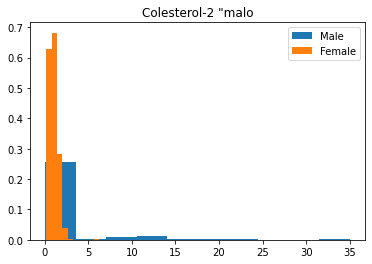

In [25]:
_ = plt.hist(data['VLDL'][data['Gender']=='M'], density=True, label='Male')
_ = plt.hist(data['VLDL'][data['Gender']=='F'], density=True, label='Female')
_ = plt.title('Colesterol-2 "malo')
_ = plt.legend()

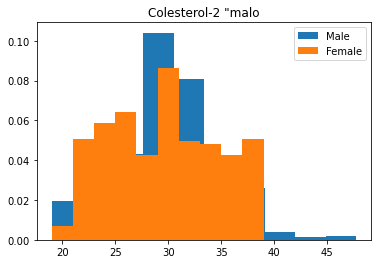

In [26]:
_ = plt.hist(data['BMI'][data['Gender']=='M'], density=True, label='Male')
_ = plt.hist(data['BMI'][data['Gender']=='F'], density=True, label='Female')
_ = plt.title('Colesterol-2 "malo')
_ = plt.legend()